<h1>Adaline Implementation With Gradient Descent in Python</h1>

In [36]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from matplotlib.colors import ListedColormap
class AdalineGD:
    """
    ADApdtive LInear NEuron classifier

    eta : float
        Learning rate 0.0 <= eta <= 1.0
    epochs : int
        Number of Iterations 
    random_state : int 
        Random State
    """
    def __init__(self,eta,epochs,random_state = 42):
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state
    
    def fit(self,X,y):
        """
        X : Matrix-Like (also Array) Shape: [n_rows,n_features] == [n,m]
        y : Array-Like (also Matrix) Shape: [n_rows,1] == [n,1]

        returns AdalineGD Object
        """
        #rgen random state controllers
        rgen = np.random.RandomState(self.random_state)

        #start w at a small vector of guesses the same size of columns in X
        self.w = rgen.normal(loc = 0.0,scale= 0.01,size=X.shape[1])
        self.b = float(0.0)
        self.losses = []
        for i in range(self.epochs):
            net_input = self.net_input_(X)
            output = self.activation(net_input)
            errors = y - output
            """
            X.T.dot(errors) explanation

            dl/dw = (-2 * sum((y - prediction)*x))/n errors is y - prediction 
            dl/dw = (-2 * sum(errors))/n

            n is n rows in dataframe

            we must transpose X beacuse errors is in format (n,1)
            X is format (n,m)

            cannot multiply (n,m) * (n,1) only solution is to X.T
            
            """
            self.w += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b += (self.eta * 2.0 * errors / len(y))
            loss = (errors*errors).mean()
            self.losses.append(loss)
        return self
    def net_input_(self,X):
        """
        X: ArrayLike MatrixLike : [n,m]
        determine the output of z function
        """
        return np.dot(X,self.w) + self.b
    
    def activation(self,X):
        return X
    
    def predict(self,X):
        return np.where(self.activation(self.net_input_(X))>= 0.5,1,0)

In [37]:
iris_df = pd.read_csv('/Users/shivvinnybhutani/LocalShiv/Projects/ML_Python/iris_data.csv', header=0, encoding='utf-8')

y = iris_df.iloc[0:100, 4]
y = np.where(y == 'Setosa', 0, 1)
X = iris_df.iloc[0:100, [0, 2]].astype(float)
X = X.values
y = y

<h1>Plots Different results with different learning rates</h1>

Text(0.5, 1.0, 'ADA with learning rate 0.0001')

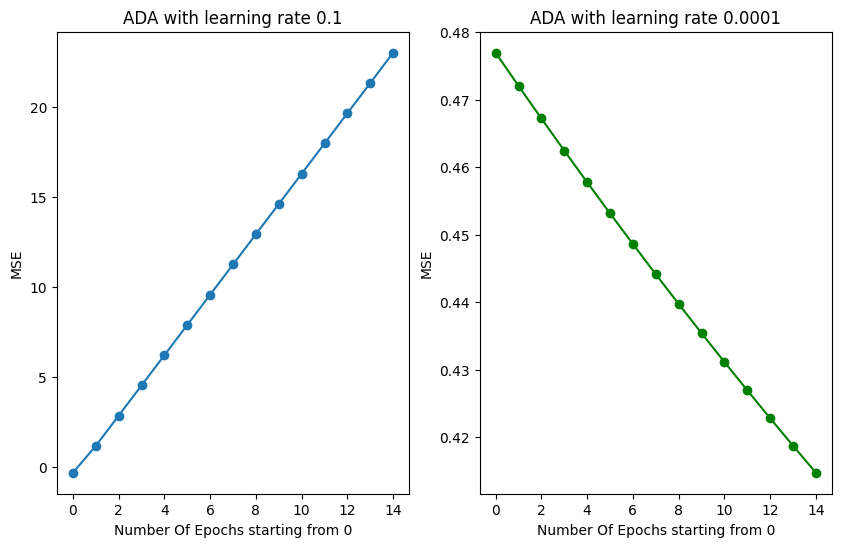

In [38]:

fig , ax = plt.subplots(nrows = 1, ncols=2 ,figsize = (10,6)) 
#Create AdalineGD with high learning rate
ad1 = AdalineGD(eta = 0.1, epochs = 15).fit(X,y)
ax[0].plot(range(len(ad1.losses)), np.log10(ad1.losses), marker = 'o')
ax[0].set_xlabel('Number Of Epochs starting from 0')
ax[0].set_ylabel('MSE')
ax[0].set_title('ADA with learning rate 0.1')

#Create AdalineGD with small learning reate
ad2 = AdalineGD(epochs=15, eta=0.0001).fit(X, y)
ax[1].plot(range(len(ad2.losses)),ad2.losses,marker = 'o',color = 'green')
ax[1].set_xlabel('Number Of Epochs starting from 0')
ax[1].set_ylabel('MSE')
ax[1].set_title('ADA with learning rate 0.0001')



In [ ]:
def plot_simple_decision_boundary(X, y, classifier):
    # Plot the data points
    markers = ('o', 's')
    colors = ('red', 'blue')
    
    for idx, cl in enumerate(np.unique(y)): #[0,1]
        plt.scatter(x=X[y == cl, 0], 
                  y=X[y == cl, 1],
                  c=colors[idx],
                  marker=markers[idx],
                  label=cl,
                  edgecolor='black')
    
    # Calculate the decision boundary line
    # For a binary classifier with standardized data:
    # w0*x + w1*y + b = 0 -> y = -(w0*x + b)/w1
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    
    # Calculate corresponding y values for the decision boundary
    y1 = -(classifier.w[0] * x_min + classifier.b) / classifier.w[1]
    y2 = -(classifier.w[0] * x_max + classifier.b) / classifier.w[1]
    
    # Plot the decision boundary line
    plt.plot([x_min, x_max], [y1, y2], 'k-', lw=1)
    
    plt.xlim(x_min, x_max)
    plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    plt.xlabel('Sepal length [standardized]')
    plt.ylabel('Petal length [standardized]')
    plt.legend(loc='upper left')

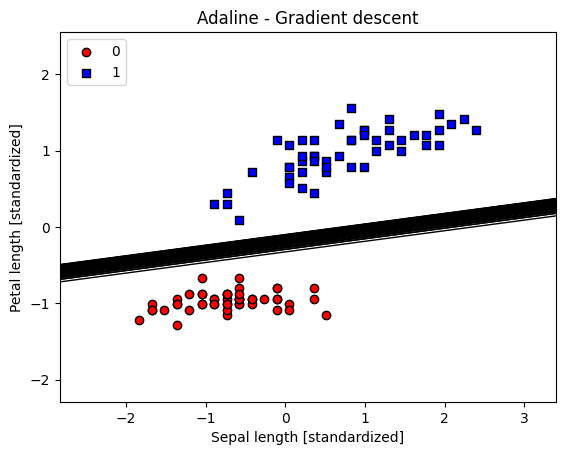

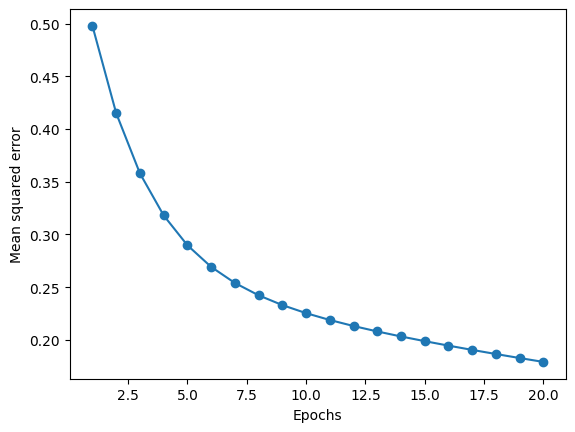

In [40]:
#X is a numpy array must us matricies indexing!
X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - np.mean(X_std[:,0]))/np.std(X_std[:,0])
X_std[:,1] = (X_std[:,1] - np.mean(X_std[:,1]))/np.std(X_std[:,1])

ada_gd = AdalineGD(epochs=20, eta=0.5)
ada_gd.fit(X_std, y)

plot_simple_decision_boundary(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.show()


plt.plot(range(1, len(ada_gd.losses) + 1),ada_gd.losses, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.show()